 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_csv_path = Path ("c:/Users/susan/cu-nyc-fin-pt-12-2020-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv")

In [3]:
whale_df = pd.read_csv(whale_csv_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [6]:
#whale_df.set_index(whale_df['Date'], inplace=True)
#whale_df.head()

In [7]:
whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [8]:
#whale_df['Date'] = pd.to_datetime(whale_df['Date'])
#whale_df

In [9]:
whale_df.sort_index(inplace=True)
#whale_df.drop(columns=['Date'], inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [10]:
# Reading algorithmic returns
algo_csv_path = Path ("c:/Users/susan/cu-nyc-fin-pt-12-2020-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv")

In [11]:
# Count nulls
algo_df = pd.read_csv(algo_csv_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [12]:
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [13]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [14]:
algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [15]:
#algo_df['Date'] = pd.to_datetime(algo_df['Date'])
#algo_df

In [16]:
#algo_df.dtypes

In [17]:
#algo_df.set_index(algo_df['Date'], inplace=True)
#algo_df.head()

In [18]:
algo_df.sort_index(inplace=True)
#algo_df.drop(columns=['Date'], inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [19]:
# Reading S&P 500 Closing Prices
sp500_csv_path = Path ("c:/Users/susan/cu-nyc-fin-pt-12-2020-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/sp500_history.csv")

In [20]:
# Check Data Types
sp500_df = pd.read_csv(sp500_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [21]:
# Fix Data Types
sp500_df.dtypes

Close    object
dtype: object

In [22]:
#sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])
#sp500_df

In [23]:
sp500_df['Close'].apply(type).value_counts()

<class 'str'>    1649
Name: Close, dtype: int64

In [24]:
# sp500['Close'] = pd.to_numeric(sp500['Close'], errors='coerce')
# sp500['Close'] = pd.to_numeric(sp500['Close'], errors='ignore')
# sp500_df[sp500_df.columns[1]] = sp500[sp500_df.columns[1]].replace('[\$,]','', regex=True).astype(float)
sp500_df['Close'] = sp500_df['Close'].apply(lambda x: x.replace('$', '').replace(',','')
                                             if isinstance(x,str) else x).astype(float)
sp500_df.head()

# sp500_df['Close'] = pd.to_numeric(sp500_df['Close'], downcast="float")

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [25]:
sp500_df.dtypes

Close    float64
dtype: object

In [26]:
# closing_prices_df = sp500_df.drop(columns=['Date'])
# closing_prices_df

In [27]:
#sp500_df.set_index(sp500_df['Date'], inplace=True)
#sp500_df.drop(columns=['Date'], inplace=True)
#sp500_df.head()

In [28]:
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [29]:
# Calculate Daily Returns
daily_returns = sp500_df.pct_change()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [30]:
# Drop nulls
daily_returns.dropna(inplace=True)
daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [31]:
# Rename `Close` Column to be specific to this portfolio.
columns = ['S&P500 Close']
daily_returns.columns = columns
daily_returns.head()

,S&P500 Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [32]:
#whale_csv_path = Path ("c:/Users/susan/cu-nyc-fin-pt-12-2020-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv")
#algo_csv_path = Path ("c:/Users/susan/cu-nyc-fin-pt-12-2020-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv")
#sp500_csv_path = Path ("c:/Users/susan/cu-nyc-fin-pt-12-2020-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/sp500_history.csv")

In [33]:
whale_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


In [34]:
algo_df.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [35]:
daily_returns.tail()

,S&P500 Close
Date,
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579
2019-04-22,0.001012
2019-04-23,0.008841


In [36]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
#whale_df = pd.read_csv(whale_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
#algo_df = pd.read_csv(algo_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
#sp500_df = pd.read_csv(sp500_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

combined_df = pd.concat([whale_df,algo_df,daily_returns], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [37]:
combined_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
Algo 1                         float64
Algo 2                         float64
S&P500 Close                   float64
dtype: object

In [38]:
# sp500_df['Close'] = sp500_df['Close'].apply(lambda x: x.replace('$', '').replace(',','')
#                                             if isinstance(x,str) else x).astype(float)

# sp500_df.dtypes

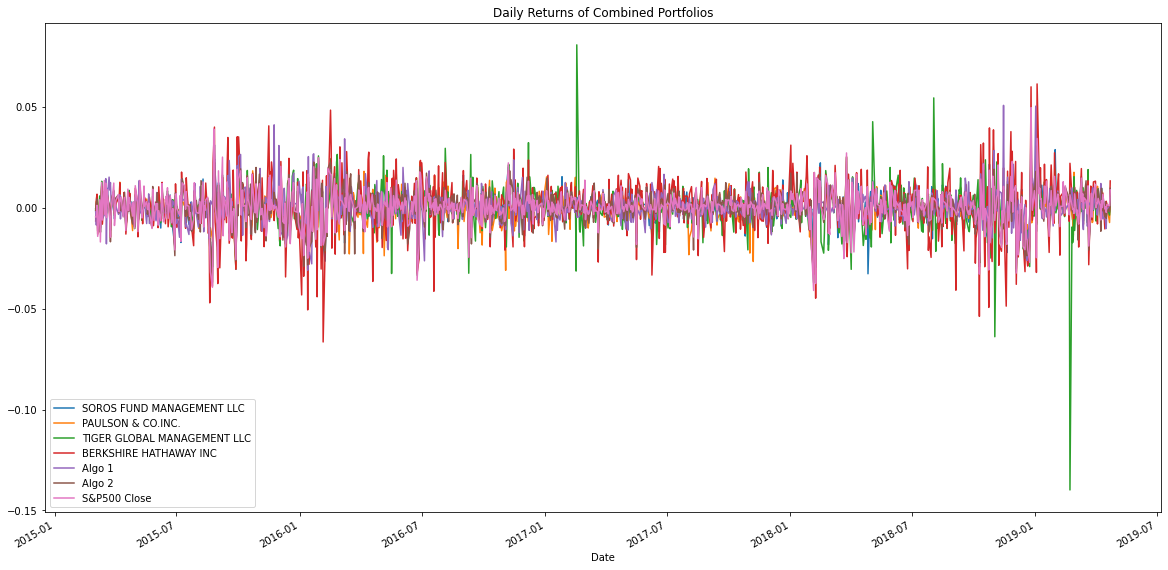

In [39]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10),title='Daily Returns of Combined Portfolios');

#### Calculate and Plot cumulative returns.

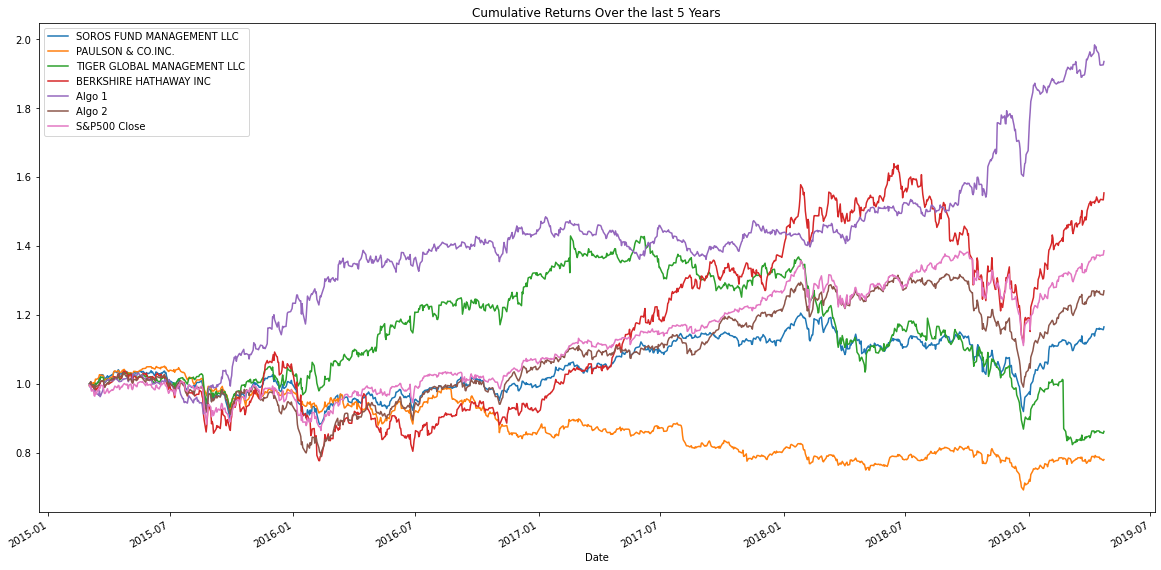

In [40]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize = (20,10), title = "Cumulative Returns Over the last 5 Years");

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


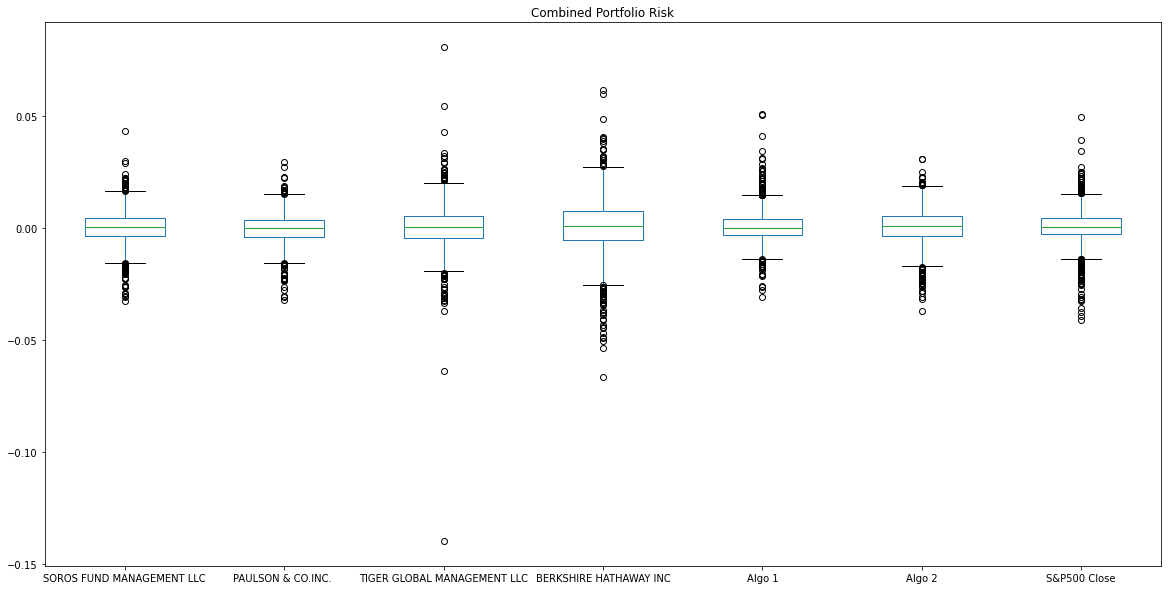

In [41]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(20,10),title='Combined Portfolio Risk');

# covariance = daily_returns[''].cov()

# variance = daily_returns[''].var()

# combined_appended_data = covariance / variance

# rolling_covariance = daily_returns[''].rolling(window=60).cov(daily_returns['sp500'])

# rolling_covariance.plot(figsize=(20,10),title = 'Rolling 60-Day Covariance of Combined Portfolio vs. SP500 Returns')

### Calculate Standard Deviations

In [42]:
# Calculate the daily standard deviations of all portfolios
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P500 Close                   0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [43]:
# Calculate  the daily standard deviation of S&P 500
sp500_risk = combined_df['S&P500 Close'].std()

# Determine which portfolios are riskier than the S&P 500
combined_df.std() > sp500_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P500 Close                   False
dtype: bool

### Calculate the Annualized Standard Deviation

In [44]:
# Calculate the annualized standard deviation (252 trading days)
combined_df.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P500 Close                   0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

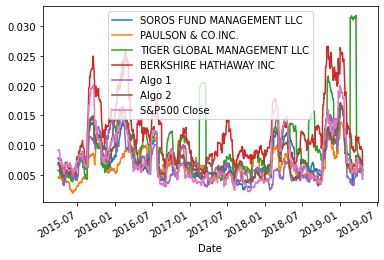

In [45]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std().plot();

# Plot the rolling standard deviation

### Calculate and plot the correlation

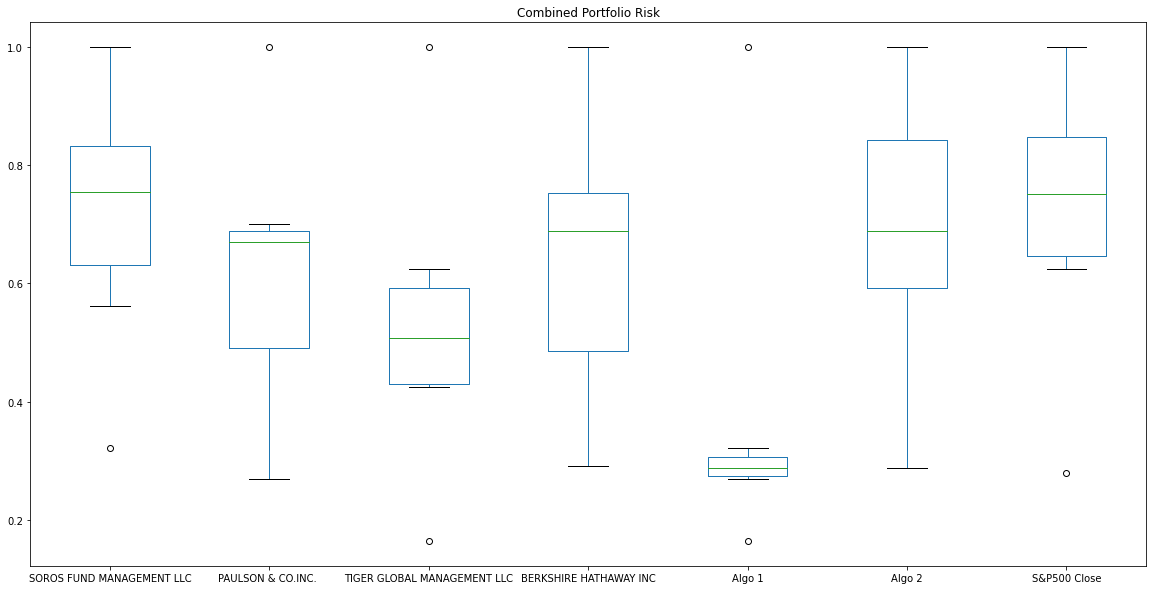

In [46]:
# Calculate the correlation
correlation = combined_df.corr()

# Display de correlation matrix
correlation.plot.box(figsize=(20,10),title='Combined Portfolio Risk');

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

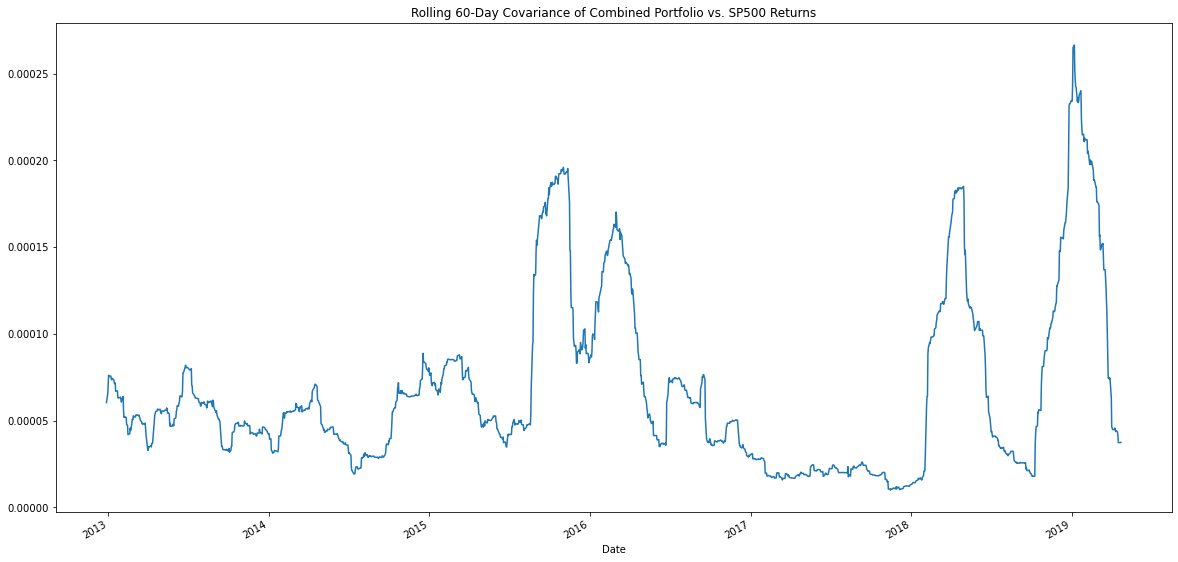

In [47]:
# Calculate covariance of a single portfolio
covariance = daily_returns['S&P500 Close'].cov(daily_returns['S&P500 Close'])

# Calculate variance of S&P 500
variance = daily_returns['S&P500 Close'].var()

# Computing beta
combined_beta = covariance / variance

# Plot beta trend
rolling_covariance = daily_returns['S&P500 Close'].rolling(window=60).cov(daily_returns['S&P500 Close'])

rolling_covariance.plot(figsize=(20,10),title = 'Rolling 60-Day Covariance of Combined Portfolio vs. SP500 Returns');

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [48]:
# Use `ewm` to calculate the rolling window
Series.ewm(self, com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0)

Pandas Series ewm image

Parameters:
Name 	Description 	Type/Default Value 	Required / Optional
com 	Specify decay in terms of center of mass, α=1/(1+com), for com≥0. 	float 	optional
span 	Specify decay in terms of span, α=2/(span+1), for span≥1. 	float 	Optional
halflife 	Specify decay in terms of half-life, α=1−exp(log(0.5)/halflife),forhalflife>0. 	float 	Optional
alpha  	Specify smoothing factor α directly, 0<α≤1 	float 	optional
min_periods 	Minimum number of observations in window required to have a value (otherwise result is NA). 	int
Default Value: 0 	Required
adjust 	Divide by decaying adjustment factor in beginning periods to account for imbalance in relative weightings (viewing EWMA as a moving average) 	bool
Default Value: True 	Required
ignore_na  	Ignore missing values when calculating weights; specify True to reproduce pre-0.15.0 behavior. 	bool
Default Value: False 	Required
axis 	The axis to use. The value 0 identifies the rows, and 1 identifies the columns. 	 {0 or ‘index’, 1 or ‘columns’}
Default Value: 0 	Required

Returns: DataFrame
A Window sub-classed for the particular operation.

Notes: Exactly one of center of mass, span, half-life, and alpha must be provided. Allowed values and relationship between the parameters are specified in the parameter descriptions above; see the link at the end of this section for a detailed explanation.
When adjust is True (default), weighted averages are calculated using weights (1-alpha)**(n-1), (1-alpha)**(n-2), …, 1-alpha, 1.
When adjust is False, weighted averages are calculated recursively as:
weighted_average[0] = arg[0]; weighted_average[i] = (1-alpha)*weighted_average[i-1] + alpha*arg[i].
When ignore_na is False (default), weights are based on absolute positions. For example, the weights of x and y used in calculating the final weighted average of [x, None, y] are (1-alpha)**2 and 1 (if adjust is True), and (1-alpha)**2 and alpha (if adjust is False).
When ignore_na is True (reproducing pre-0.15.0 behavior), weights are based on relative positions. For example, the weights of x and y used in calculating the final weighted average of [x, None, y] are 1-alpha and 1 (if adjust is True), and 1-alpha and alpha (if adjust is False).

Example:

Download the above Notebook from here.

Previous: Expanding transformations in Pandas
Next: Pandas absolute value of column
﻿

    New Content published on w3resource:
    Scala Programming Exercises, Practice, Solution
    Python Itertools exercises
    Python Numpy exercises
    Python GeoPy Package exercises
    Python Pandas exercises
    Python nltk exercises
    Python BeautifulSoup exercises
    Form Template
    Composer - PHP Package Manager
    PHPUnit - PHP Testing
    Laravel - PHP Framework
    Angular - JavaScript Framework
    React - JavaScript Library
    Vue - JavaScript Framework
    Jest - JavaScript Testing Framework



SyntaxError: invalid syntax (<ipython-input-48-b3bc13fd43f1>, line 4)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios
sharpe_ratio = combined_df['S&P500 Close'].mean() / combined_df['S&P500 Close'].std()

print(sharpe_ratio)

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(figsize=(20,10)),title = 'Sharpe Ratio'

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [56]:
# Reading data from 1st stock
goog_csv_path = Path ("c:/Users/susan/cu-nyc-fin-pt-12-2020-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/goog_historical.csv")

In [57]:
# Reading data from 2nd stock
aapl_csv_path = Path ("c:/Users/susan/cu-nyc-fin-pt-12-2020-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/aapl_historical.csv")

In [58]:
# Reading data from 3rd stock
cost_csv_path = Path ("c:/Users/susan/cu-nyc-fin-pt-12-2020-u-c/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/cost_historical.csv")

In [59]:
# Combine all stocks in a single DataFrame
goog_df = pd.read_csv(goog_csv_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
aapl_df = pd.read_csv(aapl_csv_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
cost_df = pd.read_csv(cost_csv_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

combined_df = pd.concat([goog_df, aapl_df,cost_df], axis="columns", join="inner")

combined_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,GOOG,1162.38,AAPL,200.72,COST,243.47
2019-05-08,GOOG,1166.27,AAPL,202.90,COST,241.34
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62


In [60]:
# Reset Date index
combined_df.sort_index(inplace=True)
combined_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60


In [61]:
combined_df.drop(columns=['Symbol'],inplace=True)
combined_df.head()

,NOCP,NOCP,NOCP
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [69]:
# Reorganize portfolio data by having a column per symbol
new_combined_df = combined_df.columns=['GOOG','COST','AAPL']

In [73]:
# Calculate daily returns
daily_returns = combined_df.pct_change()

In [74]:
# Drop NAs
combined_df.dropna(inplace=True)

In [75]:
# Display sample data
combined_df.head()

,GOOG,COST,AAPL
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [76]:
# Set weights
weights = [0.33, 0.33, 0.33]

In [77]:
# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

In [78]:
# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-11         NaN
2018-05-14    0.000015
2018-05-15   -0.009963
2018-05-16    0.009309
2018-05-17   -0.001579
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [79]:
# Join your returns DataFrame to the original returns DataFrame
combined_appended_data = pd.concat([goog_df,aapl_df,cost_df],axis="columns", join="inner")

In [80]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_appended_data.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [81]:
# Calculate the annualized `std`
combined_appended_data.std()

NOCP    67.846776
NOCP    21.436472
NOCP    14.434399
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [82]:
# Calculate rolling standard deviation
combined_appended_data.rolling(window=21).std()

,NOCP,NOCP,NOCP
Trade DATE,,,
2019-05-09,NaN,NaN,NaN
2019-05-08,NaN,NaN,NaN
2019-05-07,NaN,NaN,NaN
2019-05-06,NaN,NaN,NaN
2019-05-03,NaN,NaN,NaN
...,...,...,...
2018-05-17,32.672728,2.422570,3.162593
2018-05-16,31.297642,2.438591,2.768943
2018-05-15,29.554468,2.522129,2.692796


In [84]:
new_combined_df = combined_df.columns=['GOOG','COST','AAPL']

<AxesSubplot:xlabel='Trade DATE'>

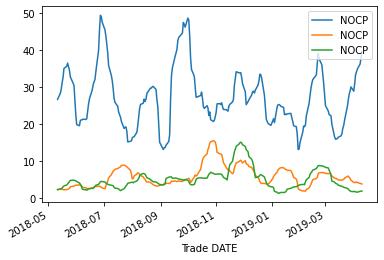

In [85]:
# Plot rolling standard deviation
combined_appended_data.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [88]:
# Calculate and plot the correlation
correlation = combined_appended_data.corr()

combined_appended_data.rolling(window=21).corr().plot()

df = pd.DataFrame(data,columns=['','B','C'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

ValueError: could not convert string to float: 'GOOG'

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta
covariance = daily_returns['GOOG','AAPL','COST'].cov(daily_returns['GOOG','AAPL','COST'])

variance = daily_returns['GOOG','AAPL','COST'].var()

combined_beta = covariance / variance

rolling_covariance = daily_returns['GOOG','AAPL','COST'].rolling(window=60).cov(daily_returns['GOOG','AAPL','COST'])

rolling_covariance.plot(figsize=(20,10),title = 'Rolling 60-Day Covariance of Combined Portfolios');

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratio = combined_appended_data['Daily Return'].mean() / combined_appended_data['Daily Return'].std()

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(figsize = 20,10), title = 'Sharpe Ratio'

### How does your portfolio do?

Write your answer here!